<a href="https://colab.research.google.com/github/sahiljagtap11/Hotel_booking_analysis_cap_project-1/blob/main/SahilJ_commit_Copy_of_Final_Group_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## EDA in the hotel industry is key to marketing strategy, building customer loyalty and enhancing productivity. By analysing the patterns available in the past data, it is helpful to make the hotel’s plan better so that hotel can perform various campaigns to boost the business. The more important things in a competitive business environment is that getting the right insights that should be advantageous. Analysing customer data allows hoteliers to understand the preferences and purposes of a customer. These are some reasons to study on the available dataset. Let’s commence

In [64]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
path ='/content/drive/MyDrive/almabetter/Hotel Bookings.csv'
hotel_data_raw = pd.read_csv(path)

# Data Exploration And Data Cleaning


In [67]:
hotel_data_raw.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [68]:
hotel_data_raw.tail() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [69]:
hotel_data_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [70]:
hotel_data_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [71]:
# To find the duplicates.
hotel_data_raw.duplicated().value_counts()


False    87396
True     31994
dtype: int64

In [72]:
# drop the 31994 duplicate values.
hotel_data_raw = hotel_data_raw.drop(hotel_data_raw.duplicated().value_counts())
hotel_data_raw = hotel_data_raw.drop_duplicates()

In [73]:
# find null values
hotel_data_raw.isnull().sum().sort_values(ascending = False)

company                           82135
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [74]:
# replace  null values with the correct values
hotel_data_raw['company'].fillna(0.0,inplace=True)
hotel_data_raw['agent'].fillna(0.0,inplace=True)
hotel_data_raw['country'].fillna('other',inplace=True)
hotel_data_raw['children'].fillna(0.0,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [75]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotel_data_raw[(hotel_data_raw.adults + hotel_data_raw.babies + hotel_data_raw.children) == 0].shape 

(166, 32)

In [76]:
hotel_data_raw = hotel_data_raw.drop(hotel_data_raw[(hotel_data_raw.adults + hotel_data_raw.babies+hotel_data_raw.children) == 0].index)

In [77]:
# Adding total staying days in hotels so that total stays in hotel can be analysed.
hotel_data_raw['stays_in_weekend_and_week_nights'] = hotel_data_raw['stays_in_weekend_nights']+hotel_data_raw['stays_in_week_nights']

In [78]:
# After updating the dataset we got 87228 rows with 33 columns.
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87228 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hotel                             87228 non-null  object 
 1   is_canceled                       87228 non-null  int64  
 2   lead_time                         87228 non-null  int64  
 3   arrival_date_year                 87228 non-null  int64  
 4   arrival_date_month                87228 non-null  object 
 5   arrival_date_week_number          87228 non-null  int64  
 6   arrival_date_day_of_month         87228 non-null  int64  
 7   stays_in_weekend_nights           87228 non-null  int64  
 8   stays_in_week_nights              87228 non-null  int64  
 9   adults                            87228 non-null  int64  
 10  children                          87228 non-null  float64
 11  babies                            87228 non-null  int64  
 12  mea

#1. Which is the most preferrable meal type ?

In [79]:
# total confirmed bookings
confirm_bookings = hotel_data_raw[hotel_data_raw['is_canceled']==0]

In [80]:
meal_type = ['Bed and Breakfast', 'Half Board','Self Catering','Undefined','Full Board']
meal_count = confirm_bookings['meal'].value_counts()

In [81]:
meal_count

BB           49862
HB            6631
SC            6055
Undefined      410
FB             261
Name: meal, dtype: int64

In [82]:
#converting meal count in percentage
percentage_meal_count = confirm_bookings['meal'].value_counts(normalize = True)*100
percentage_meal_count

BB           78.871858
HB           10.488935
SC            9.577817
Undefined     0.648539
FB            0.412851
Name: meal, dtype: float64

Text(0, 0.5, 'Percentage of meal counts')

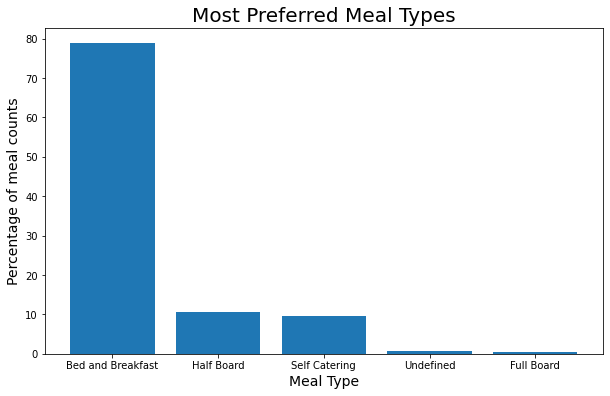

In [83]:
#Bar chart
plt.figure(figsize = (10,6))
plt.bar(meal_type,percentage_meal_count)
plt.title('Most Preferred Meal Types',fontsize = 20)
plt.xlabel('Meal Type',fontsize = 14)
plt.ylabel('Percentage of meal counts',fontsize = 14)

Bed and Breakfast is the most preferrable meal types.

#2.	Which type of hotel get maximum number of cancellation of bookings?

In [84]:
hotel_data_raw['is_canceled'].value_counts()
# 0 = not canceled booking
# 1 = canceled booking

0    63219
1    24009
Name: is_canceled, dtype: int64

In [85]:
#total canceled booking
canceled_df= hotel_data_raw.loc[hotel_data_raw['is_canceled']==1]
canceled_df = pd.DataFrame(canceled_df)

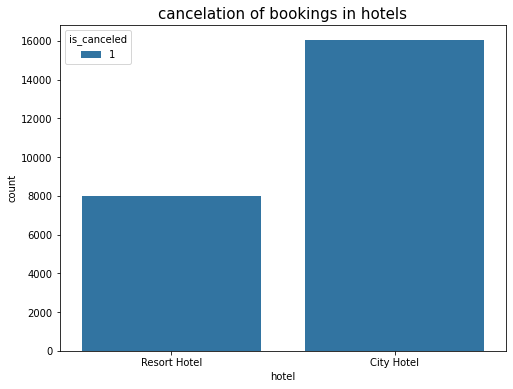

In [86]:
#bar chart
fig = plt.gcf()
fig.set_size_inches(8, 6) 
plt.title("cancelation of bookings in hotels", fontsize = 15) 
sns.countplot(x='hotel', data=canceled_df, hue ='is_canceled')

City Hotel has maximum number of cancellation of bookings as compared to Resort Hotel.

# 3.	Which type of hotels have maximum repeated guests?

In [87]:
hotel_data_raw['is_repeated_guest'].value_counts()
# 0 = not repeated guests
# 1 = repeated guests

0    83864
1     3364
Name: is_repeated_guest, dtype: int64

In [88]:
repeated_guest= hotel_data_raw.loc[hotel_data_raw['is_repeated_guest']==1,'hotel'].value_counts(normalize = True)*100
repeated_guest = pd.DataFrame(repeated_guest,columns = ['hotel'])
repeated_guest

,hotel
Resort Hotel,50.743163
City Hotel,49.256837


Text(0, 0.5, 'repeated_guest (%)')

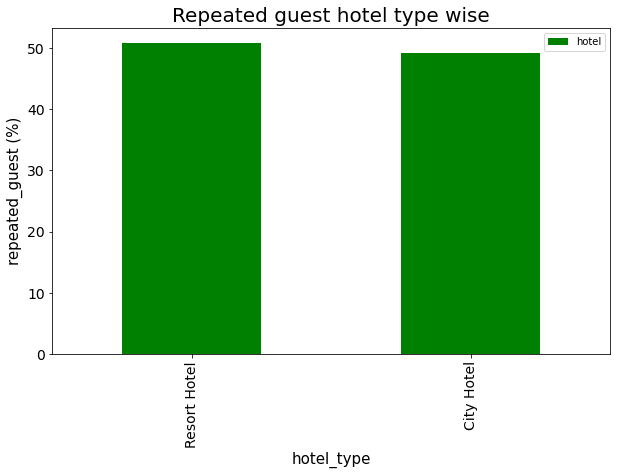

In [89]:
#bar chart
ax = repeated_guest.plot.bar(color = ['green'],figsize = (10,6),fontsize =14)
ax.set_title('Repeated guest hotel type wise',fontsize = 20)
ax.set_xlabel('hotel_type',fontsize=15)
ax.set_ylabel('repeated_guest (%)',fontsize=15)

 Resort hotel type has maximum repeated guest as compared to city hotel.

# 4.Which is the least cancelled month of hotel booking ?

In [90]:
canceled_booking = hotel_data_raw.loc[hotel_data_raw['is_canceled']==1,'arrival_date_month'].value_counts()
canceled_booking

August       3622
July         3196
May          2442
April        2406
June         2353
March        1829
October      1642
September    1641
February     1412
December     1377
November     1052
January      1037
Name: arrival_date_month, dtype: int64

In [91]:
canceled_booking = pd.DataFrame(canceled_booking)
canceled_booking

,arrival_date_month
August,3622
July,3196
May,2442
April,2406
June,2353
March,1829
October,1642
September,1641
February,1412
December,1377


In [92]:
canceled_booking = hotel_data_raw.loc[hotel_data_raw['is_canceled']==1,'arrival_date_month'].value_counts(normalize='index')*100
canceled_booking = pd.DataFrame(canceled_booking)                      
canceled_booking

,arrival_date_month
August,15.086009
July,13.311675
May,10.171186
April,10.021242
June,9.800491
March,7.617977
October,6.839102
September,6.834937
February,5.881128
December,5.735349


Text(0, 0.5, 'Percentage of cancelled booking')

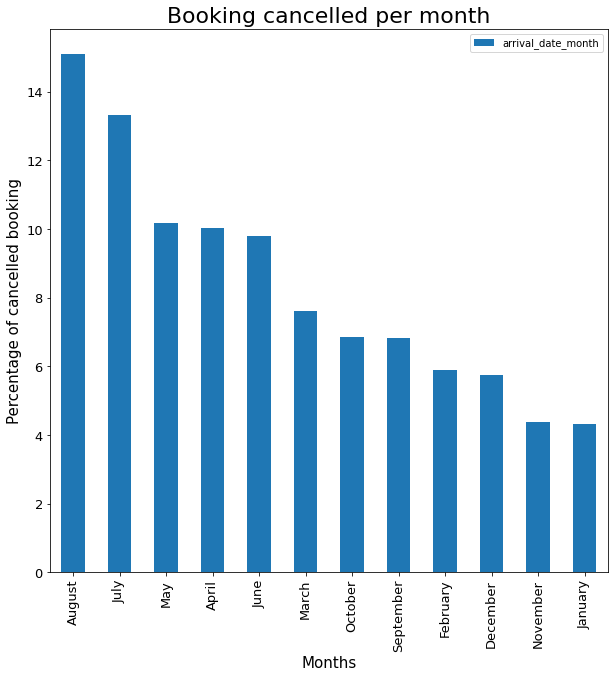

In [93]:
#bar chart
an = canceled_booking.plot.bar(figsize= (10,10),fontsize= 13)
an.set_title('Booking cancelled per month',fontsize  = 22)
an.set_xlabel('Months',fontsize = 15)
an.set_ylabel('Percentage of cancelled booking',fontsize = 15)

The least cancelled month of hotel booking is january with the percentage cancellation of 4.08% 

# 5. Which is the second most booking month for hotel ?


In [94]:
confirm_bookings = hotel_data_raw[hotel_data_raw['is_canceled']==0]

In [95]:
month_count = confirm_bookings['arrival_date_month'].value_counts()
month_count

August       7620
July         6847
May          5902
March        5660
April        5493
June         5403
October      5279
September    5041
February     4671
November     3921
December     3735
January      3647
Name: arrival_date_month, dtype: int64

In [96]:
month_count = confirm_bookings['arrival_date_month'].value_counts(normalize = True)*100
month_count


August       12.053338
July         10.830605
May           9.335801
March         8.953005
April         8.688844
June          8.546481
October       8.350338
September     7.973869
February      7.388602
November      6.202249
December      5.908034
January       5.768835
Name: arrival_date_month, dtype: float64

Text(0.5, 1.0, 'confirm bookings')

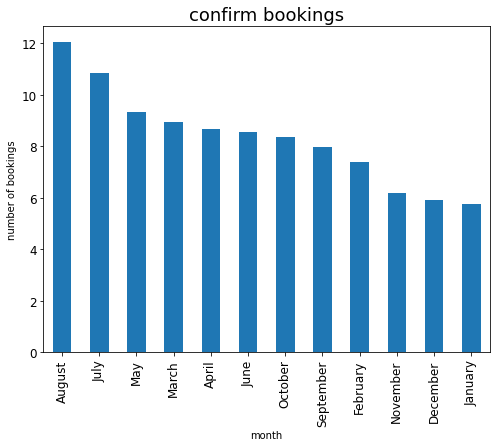

In [97]:
#bar chart
grph = month_count.plot.bar(figsize= (8,6),fontsize = 12)
grph.set_xlabel('month',fontsize = 10)
grph.set_ylabel('number of bookings',fontsize = 10)
grph.set_title('confirm bookings',fontsize = 18)

In [98]:
# to sort months in correct order
correct_order = ['January','February','March','April','May','June','July','August','September','October',
                 'November','December']
#sorted months                 
sorted_months = confirm_bookings['arrival_date_month'].value_counts().reindex(correct_order)


Text(0.5, 1.0, 'Number of Bookings per Month')

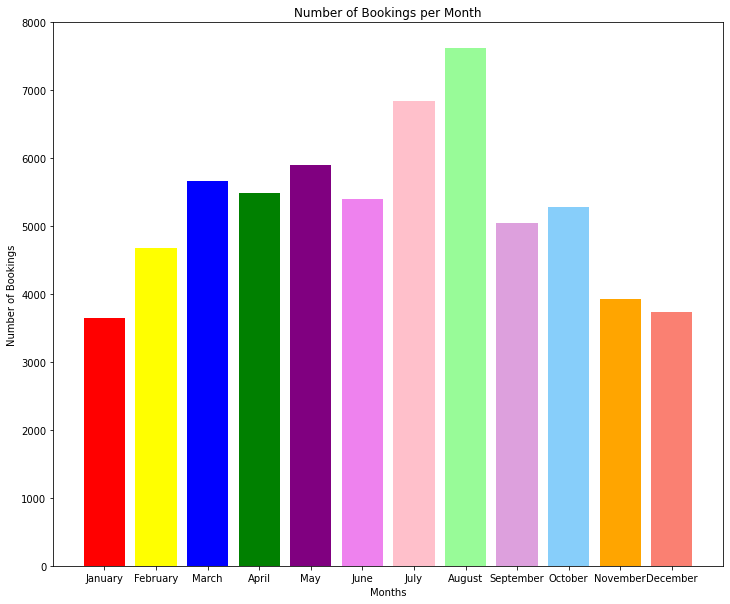

In [99]:
#colourfull bar chart
x_axis = sorted_months.index
y_axis = sorted_months
plt.figure(figsize = (12,10))
plt.bar(x_axis,y_axis, color = ['red','yellow','blue','green','purple','violet','pink','palegreen','plum','lightskyblue','orange','salmon'])
plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Month')

The second most hotel booking month is july.

# 6.What is deposit type for every customer type?

In [100]:
hotel_data_raw[['deposit_type']].value_counts()

deposit_type
No Deposit      86083
Non Refund       1038
Refundable        107
dtype: int64

In [101]:
deposit_df= confirm_bookings[['deposit_type']].value_counts()
deposit_df

deposit_type
No Deposit      63083
Refundable         81
Non Refund         55
dtype: int64

In [102]:
# Combine Customer type and deposit type 
cust_and_dep = confirm_bookings[['customer_type','deposit_type']].value_counts()
cust_and_dep

customer_type    deposit_type
Transient        No Deposit      50199
Transient-Party  No Deposit       9778
Contract         No Deposit       2623
Group            No Deposit        483
Transient-Party  Refundable         76
                 Non Refund         55
Group            Refundable          5
dtype: int64

In [103]:
u = pd.DataFrame(confirm_bookings[['customer_type','deposit_type']].value_counts())
u

0
customer_type   deposit_type       
Transient       No Deposit    50199
Transient-Party No Deposit     9778
Contract        No Deposit     2623
Group           No Deposit      483
Transient-Party Refundable       76
                Non Refund       55
Group           Refundable        5

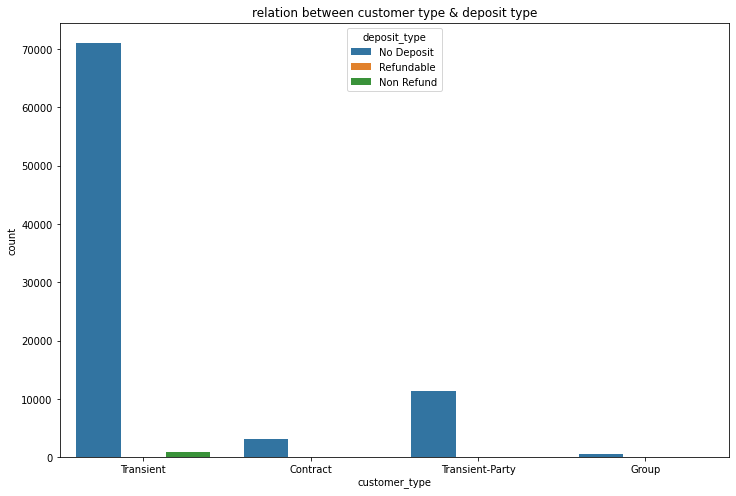

In [104]:
#multiple bar chart
fig = plt.gcf() 
fig.set_size_inches(12,8) 
plt.title('relation between customer type & deposit type')
sns.countplot(x='customer_type', data=hotel_data_raw ,hue='deposit_type')

Most of the customer types chose no deposits. 

#7 .Which hotel type got the higher number of special requests?

In [105]:
hotel_data_raw['total_of_special_requests'].value_counts()

0    43787
1    28976
2    11795
3     2314
4      320
5       36
Name: total_of_special_requests, dtype: int64

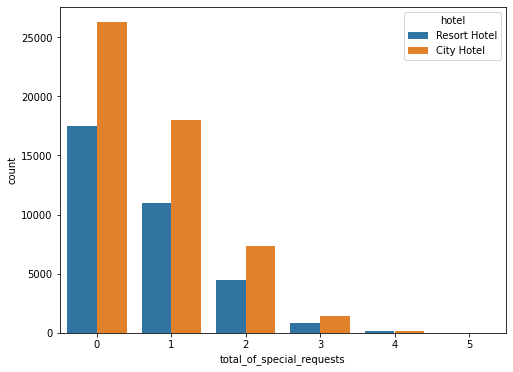

In [106]:
# Group bar chart
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
sns.countplot(x='total_of_special_requests',data=hotel_data_raw, hue= 'hotel')

The city hotel got the higher number of special requests.

#8.Bookings trend of hotels month wise.

In [107]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_not_canceled = hotel_data_raw[hotel_data_raw['is_canceled'] == 0]
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)
sorted_months

January      3647
February     4671
March        5660
April        5493
May          5902
June         5403
July         6847
August       7620
September    5041
October      5279
November     3921
December     3735
Name: arrival_date_month, dtype: int64

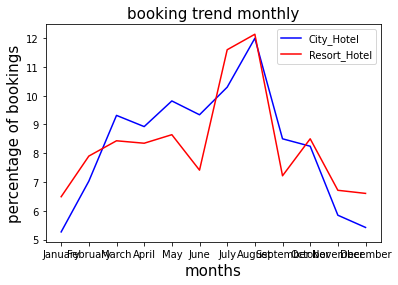

In [108]:
#select only city hotel
sorted_months_1 = df_not_canceled.loc[hotel_data_raw.hotel=='City Hotel','arrival_date_month'].value_counts().reindex(new_order)
# select only Resort hotel
sorted_months_2 = df_not_canceled.loc[hotel_data_raw.hotel=='Resort Hotel','arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months_1.index
y = sorted_months_1/sorted_months_1.sum()*100

w = sorted_months_2.index
z = sorted_months_2/sorted_months_2.sum()*100

plt.plot(x,y, label='City_Hotel', color='blue')
plt.plot(w,z, label='Resort_Hotel', color='red')
plt.legend()
plt.xlabel("months", fontsize = 15)
plt.ylabel('percentage of bookings', fontsize = 15)
plt.title('booking trend monthly', fontsize=15)
plt.show()
plt.rcParams['figure.figsize']=(20,10)

# 9. Lead time relation using Box plot

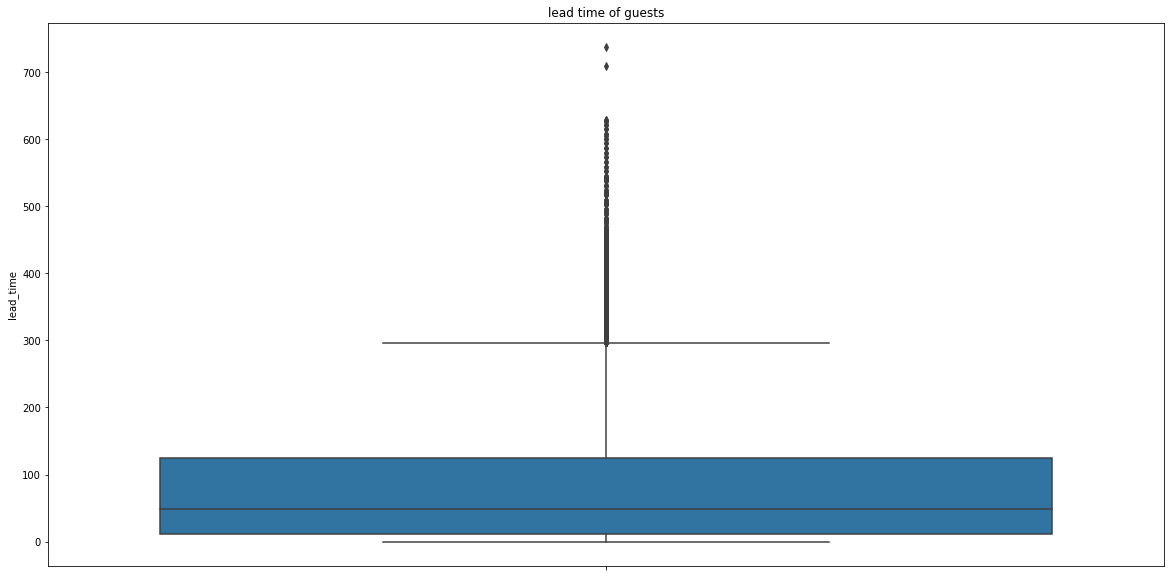

In [109]:
#box plot 
g = sns.boxplot (y =hotel_data_raw["lead_time"])
plt.title("lead time of guests")
plt.show()

We can see that the maximum guests comes in between 1 to 120 days approximately i.e.1 to 4 months.And beyond 300 days outliers are there.

# 10.Which is the most reserved room type  ?

In [110]:
reserved_rooms= hotel_data_raw['reserved_room_type'].value_counts()
reserved_rooms

A    56434
D    17376
E     6036
F     2820
G     2050
B      996
C      914
H      596
L        6
Name: reserved_room_type, dtype: int64

Text(0.5, 1.0, 'Most Reserved Room Type')

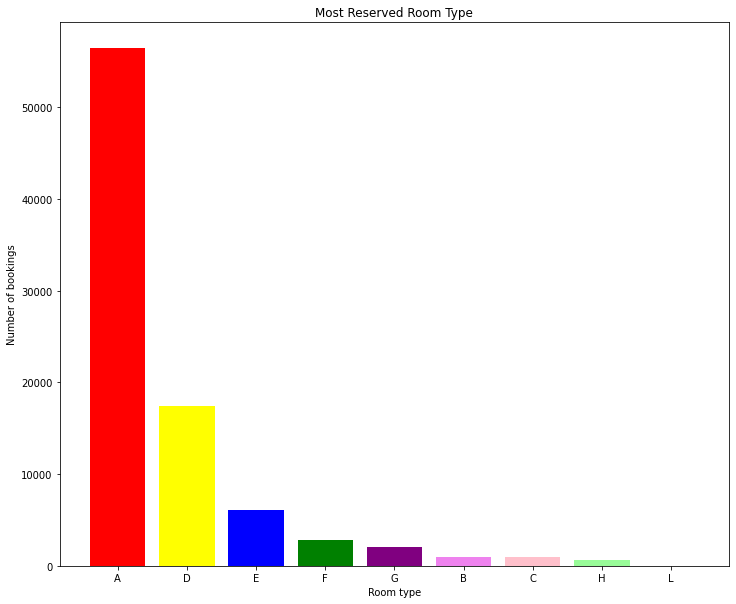

In [111]:
# bar chart
x_axis = reserved_rooms.index
y_axis = reserved_rooms
plt.figure(figsize = (12,10))
plt.bar(x_axis,y_axis, color = ['red','yellow','blue','green','purple','violet','pink','palegreen','plum','lightskyblue','orange','salmon'])
plt.xlabel('Room type')
plt.ylabel('Number of bookings')
plt.title('Most Reserved Room Type')

 A is the most reserved room type.

#	11. In which year maximum number of reservation status is checked out?

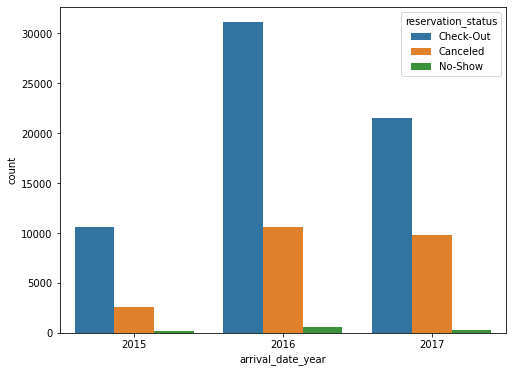

In [112]:
# grouped bar chart
fig = plt.gcf() #gcf- greatest common factor
fig.set_size_inches(8, 6) 
sns.countplot(x='arrival_date_year',data=hotel_data_raw, hue= 'reservation_status')


In 2016, maximun number of reservation_status is checked_out.


#	12 .Comparison of hotels ADR (Average Daily Rate) week wise.

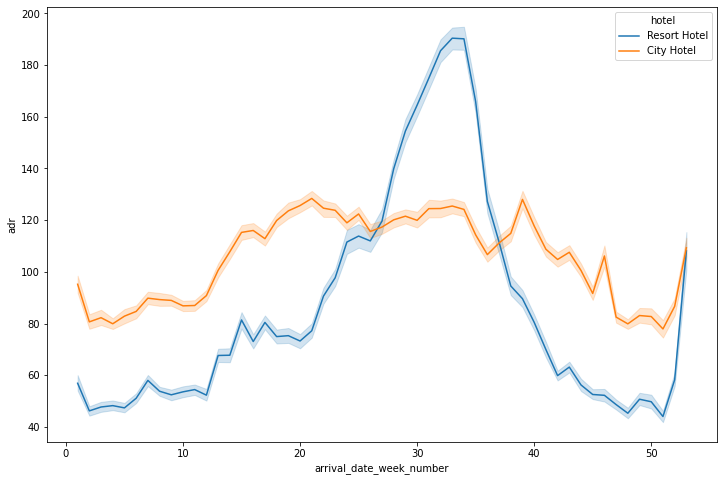

In [113]:
# lineplot of ADR 
plt.figure(figsize=(12,8))
sns.lineplot(x = 'arrival_date_week_number',y = 'adr', hue='hotel', data=df_not_canceled)

Difference of Adr in both hotel types is high at the starting week of year i.e january month. At the end of week, ADR of both hotel types is same. Avarage Daily Rate (ADR) for the week 28 to 35 (approx) i.e the months of july and August are more for the resort Hotel than city hotel.

# 13. Which country booked the most number of hotels? 

In [114]:
booking_confirmed = hotel_data_raw[hotel_data_raw['is_canceled']==0]

In [115]:
country_count = booking_confirmed['country'].value_counts()
country_count_df = pd.DataFrame(country_count.head(10), columns = ['country']).reset_index(level=0)
country_count_df

,index,country
0,PRT,17573
1,GBR,8439
2,FRA,7091
3,ESP,5382
4,DEU,4332
5,IRL,2347
6,ITA,1986
7,BEL,1670
8,NLD,1560
9,USA,1411


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


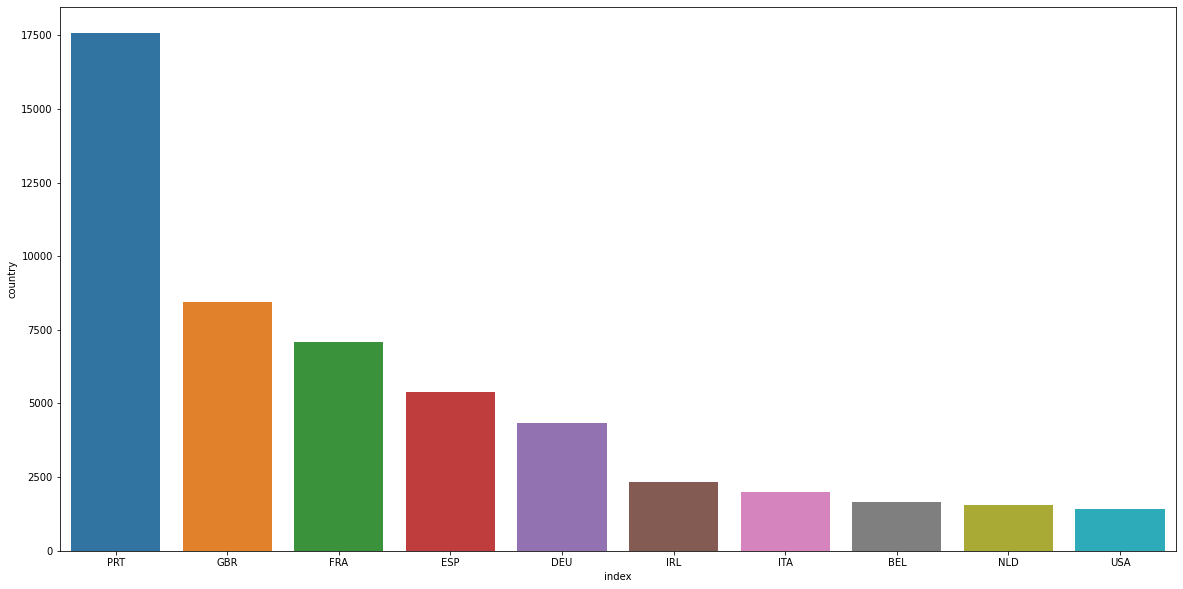

In [116]:
# bar chart
sns.barplot(country_count_df['index'], country_count_df['country'])

PRT i.e Portugal booked the maximum number of hotels.


# 14. What is the percentage of booking cancellation?

In [117]:
hotel_data_raw['is_canceled'].value_counts()

0    63219
1    24009
Name: is_canceled, dtype: int64

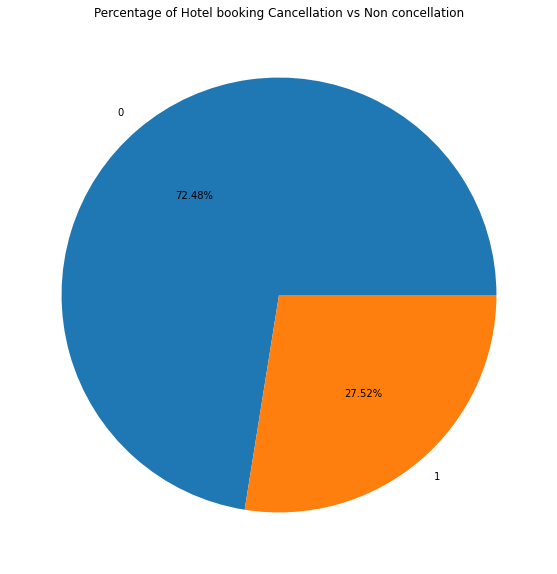

In [118]:
# pie chart
plt.figure(figsize=(10,10))
plt.pie(hotel_data_raw['is_canceled'].value_counts(),labels=hotel_data_raw['is_canceled'].value_counts().keys(),autopct = '%0.2f%%')
plt.title('Percentage of Hotel booking Cancellation vs Non concellation');

0 means not cancelled and 1 means cancelled.

 27.52 % bookings were cancelled.